In [1]:
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt

In [2]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [19]:

# Define the path to the directory containing the feature files
directory_path = '/content/drive/MyDrive/FYP_dataset/Results/model_vs_accuracy_graph'
# Get a list of all feature file paths in the directory
file = glob.glob(directory_path + '/*.csv')

print(len(file))

1


In [20]:
df = pd.read_csv(file[0])
print(df)

                                          model_name  A_R2_Score  A_accuracy  \
0                               LR -  Baseline Model      0.5262      0.7729   
1                                                SVR      0.3765      0.7537   
2       BiLSTM (folds=5 ,lr=0.001) - Reference Model      0.5788      0.8102   
3  BiLSTM + DNN (fold=5 , lr=0.001 , dense_layer=...      0.6090      0.8196   

   V_R2_Score  V_accuracy   A_mse   V_mse  A_rmse  V_rmse  
0      0.3179      0.7096  0.0483  0.0477  0.1956  0.1942  
1      0.2939      0.6759  0.0610  0.0646  0.2258  0.2111  
2      0.3879      0.7407  0.0381  0.0421  0.1854  0.1912  
3      0.4451      0.7497  0.0363  0.0382  0.1753  0.1867  


In [21]:
model = []
a_r2_score = []
a_accuracy = []
a_rmse=[]
v_r2_score = []
v_accuracy = []
v_rmse=[]

model = df['model_name'].astype(str)
a_r2_score = ((df['A_R2_Score'].values)*100).round(2)
a_accuracy = ((df['A_accuracy'].values)*100).round(2)
a_rmse=((df['A_rmse'].values)*100).round(2)
v_r2_score = ((df['V_R2_Score'].values)*100).round(2)
v_accuracy = ((df['V_accuracy'].values)*100).round(2)
v_rmse=((df['V_rmse'].values)*100).round(2)

print("model ",model)
print("a_r2_score ",a_r2_score)
print("a_accuracy ",a_accuracy)
print("v_r2_score ",v_r2_score)
print("v_accuracy ",v_accuracy)
print("a_rmse ",a_rmse)

model  0                                 LR -  Baseline Model
1                                                  SVR
2         BiLSTM (folds=5 ,lr=0.001) - Reference Model
3    BiLSTM + DNN (fold=5 , lr=0.001 , dense_layer=...
Name: model_name, dtype: object
a_r2_score  [52.62 37.65 57.88 60.9 ]
a_accuracy  [77.29 75.37 81.02 81.96]
v_r2_score  [31.79 29.39 38.79 44.51]
v_accuracy  [70.96 67.59 74.07 74.97]
a_rmse  [19.56 22.58 18.54 17.53]


In [22]:
import matplotlib.pyplot as plt
import pandas as pd



In [23]:
model=["LR","SVR","BiLSTM","BiLSTM+DNN"]

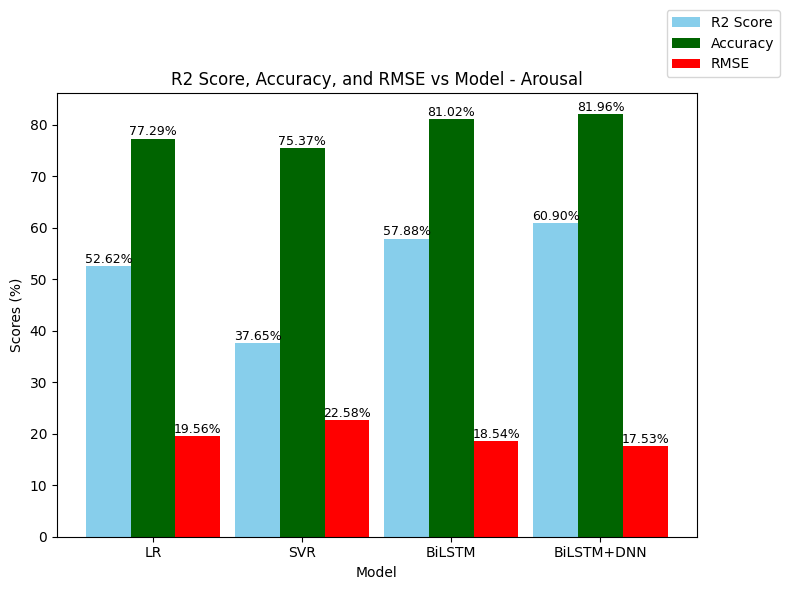

In [24]:

# Set the width of the bars
bar_width = 0.3 # Adjust the bar width as needed

# Create numerical positions on the X-axis for each model
x = np.arange(len(model))

# Create the figure and axis objects
fig, ax = plt.subplots(figsize=(8,6 ))

# Create bars for R2 Score
bar1 = ax.bar(x - bar_width, a_r2_score, bar_width, label='R2 Score', color="skyblue")

# Create bars for Accuracy
bar2 = ax.bar(x, a_accuracy, bar_width, label='Accuracy', color="darkgreen")

# Create bars for MSE
bar3 = ax.bar(x + bar_width, a_rmse, bar_width, label='RMSE', color="red")

# Add labels, title, and legend
ax.set_xlabel('Model')
ax.set_ylabel('Scores (%)')
ax.set_title('R2 Score, Accuracy, and RMSE vs Model - Arousal')
ax.set_xticks(x)
ax.set_xticklabels(model)

# Annotate the bars with their respective scores
for i, (r2, acc, mse) in enumerate(zip(a_r2_score, a_accuracy, a_rmse)):
    ax.text(x[i] - bar_width, r2 + 0.02, f'{r2:.2f}%', ha='center', va='bottom', fontsize=9)
    ax.text(x[i], acc + 0.02, f'{acc:.2f}%', ha='center', va='bottom', fontsize=9)
    ax.text(x[i] + bar_width, mse + 0.02, f'{mse:.2f}%', ha='center', va='bottom', fontsize=9)

# Move the legend outside of the graph to the upper right
ax.legend(loc="upper right", bbox_to_anchor=(1, 1),borderaxespad=-6)

# Show the plot
plt.tight_layout()
plt.show()


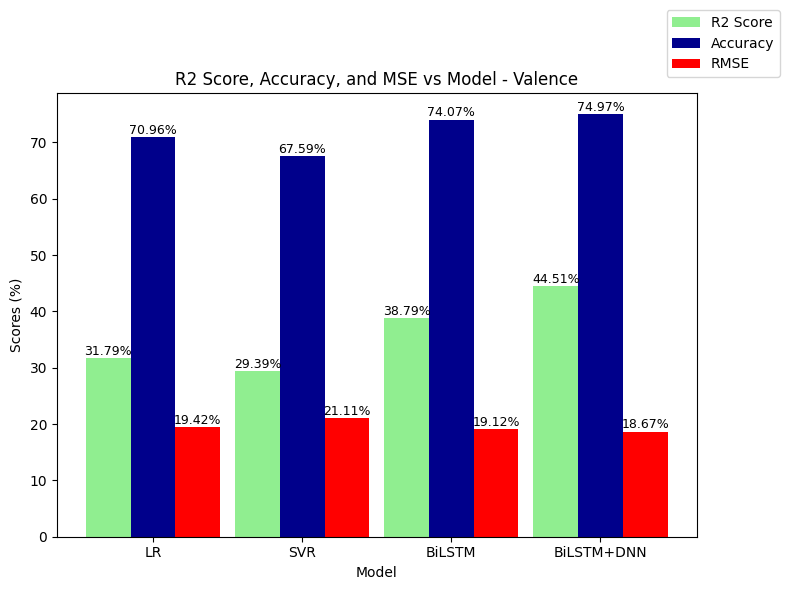

In [25]:
# Set the width of the bars
bar_width = 0.3 # Adjust the bar width as needed

# Create numerical positions on the X-axis for each model
x = np.arange(len(model))

# Create the figure and axis objects
fig, ax = plt.subplots(figsize=(8,6 ))

# Create bars for R2 Score
bar1 = ax.bar(x - bar_width, v_r2_score, bar_width, label='R2 Score', color="lightgreen")

# Create bars for Accuracy
bar2 = ax.bar(x, v_accuracy, bar_width, label='Accuracy', color="darkblue")

# Create bars for MSE
bar3 = ax.bar(x + bar_width, v_rmse, bar_width, label='RMSE', color="red")

# Add labels, title, and legend
ax.set_xlabel('Model')
ax.set_ylabel('Scores (%)')
ax.set_title('R2 Score, Accuracy, and MSE vs Model - Valence')
ax.set_xticks(x)
ax.set_xticklabels(model)

# Annotate the bars with their respective scores
for i, (r2, acc, mse) in enumerate(zip(v_r2_score, v_accuracy, v_rmse)):
    ax.text(x[i] - bar_width, r2 + 0.02, f'{r2:.2f}%', ha='center', va='bottom', fontsize=9)
    ax.text(x[i], acc + 0.02, f'{acc:.2f}%', ha='center', va='bottom', fontsize=9)
    ax.text(x[i] + bar_width, mse + 0.02, f'{mse:.2f}%', ha='center', va='bottom', fontsize=9)

# Move the legend outside of the graph to the upper right
ax.legend(loc="upper right", bbox_to_anchor=(1, 1),borderaxespad=-6)

# Show the plot
plt.tight_layout()
plt.show()
